In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fetch data for a stock (AAPL - Apple)
stock_symbol = "AAPL"
df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")

# Display the first few rows



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
2015-01-05,23.635284,24.169164,23.448427,24.089082,257142000
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400
2015-01-07,23.968962,24.069063,23.735389,23.846614,160423600
2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000
...,...,...,...,...,...
2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800
2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300


In [6]:
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

In [7]:
df.shape

(2264, 7)

In [8]:
df.isna().sum()

Price   Ticker
Close   AAPL       0
High    AAPL       0
Low     AAPL       0
Open    AAPL       0
Volume  AAPL       0
SMA_10             9
SMA_50            49
dtype: int64

In [9]:
df

Price,Close,High,Low,Open,Volume,SMA_10,SMA_50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400,NaN,NaN
2015-01-05,23.635284,24.169164,23.448427,24.089082,257142000,NaN,NaN
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400,NaN,NaN
2015-01-07,23.968962,24.069063,23.735389,23.846614,160423600,NaN,NaN
2015-01-08,24.889906,24.947743,24.180291,24.298190,237458000,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800,194.578767,184.200592
2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300,194.565845,184.487575


In [10]:
df['Prev_Close'] = df['Close'].shift(1)

In [11]:
df['Daily_Change'] = df.Close.AAPL - df['Prev_Close']

In [12]:
df.dropna(inplace=True) 

In [13]:
df

Price,Close,High,Low,Open,Volume,SMA_10,SMA_50,Prev_Close,Daily_Change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2015-03-16,27.904793,27.904793,27.440273,27.665832,143497200,28.089934,26.677913,27.601067,0.303726
2015-03-17,28.371546,28.434077,28.061120,28.116952,204092400,28.038121,26.758935,27.904793,0.466753
2015-03-18,28.690908,28.845005,28.221921,28.362616,261083600,28.036558,26.860048,28.371546,0.319363
2015-03-19,28.474279,28.865103,28.451947,28.753439,183238000,28.060901,26.956783,28.690908,-0.216629
2015-03-20,28.116955,28.675272,27.951693,28.641775,274780400,28.045268,27.039743,28.474279,-0.357325
...,...,...,...,...,...,...,...,...,...
2023-12-22,192.444595,194.243791,191.818350,194.015153,37122800,194.578767,184.200592,193.518112,-1.073517
2023-12-26,191.897873,192.732856,191.679185,192.454528,28919300,194.565845,184.487575,192.444595,-0.546722


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure no missing values
df.dropna(inplace=True)

# Define Features and Target
features = ['SMA_10', 'SMA_50', 'Prev_Close', 'Daily_Change']  # Features used for prediction
target = 'Close'  # Target variable (Stock Price)

X = df[features]
y = df[target]

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Standardize Features (optional for better convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 1772, Testing samples: 443


In [15]:
from sklearn.linear_model import LinearRegression

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Errors
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_lr:.2f}")


Linear Regression - Mean Absolute Error (MAE): 0.00
Linear Regression - Root Mean Squared Error (RMSE): 0.00


In [17]:
y_test

Ticker,AAPL
Date,
2022-03-28,172.800034
2022-03-29,176.106461
2022-03-30,174.935455
2022-03-31,171.825806
2022-04-01,171.530609
...,...
2023-12-22,192.444595
2023-12-26,191.897873
2023-12-27,191.997269


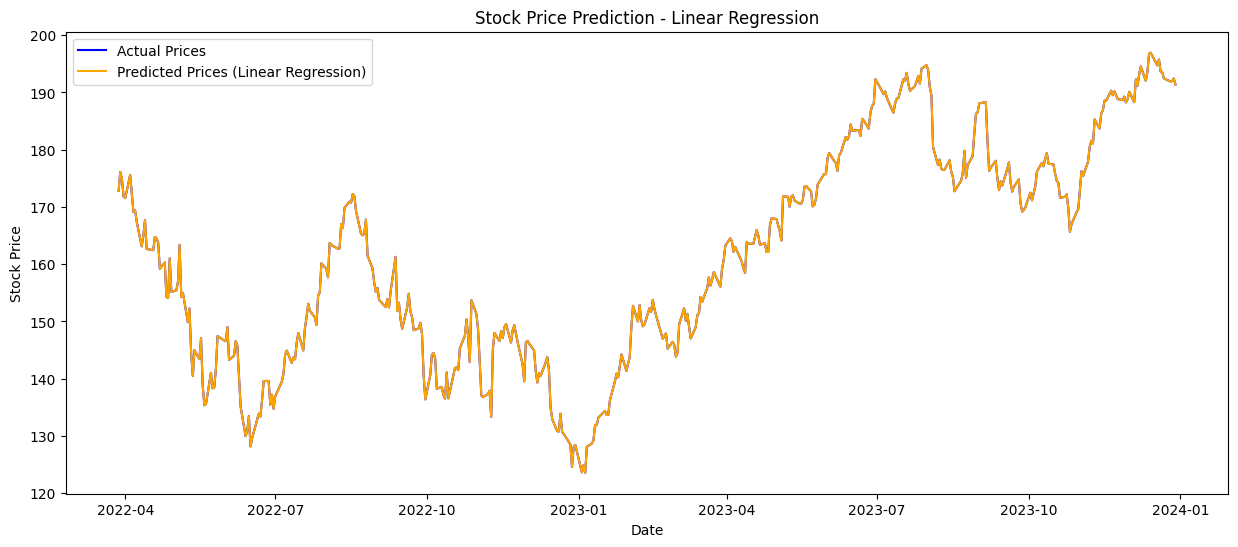

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color='blue')
plt.plot(y_test.index, y_pred_lr, label="Predicted Prices (Linear Regression)", color='orange')
plt.legend()
plt.title("Stock Price Prediction - Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()
